# **ML Model for Domian classifications based on profile summary and profile headline**

In [2]:
import pandas as pd
import re
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as rm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_csv('Before_BERT(Preprocessed).csv')

In [6]:
df1['ProfileHeadline'] = df1['Profile Headline']
df1['ProfileSummary'] = df1['Profile Summary']

In [7]:
df1['ProfileSummary'].isnull().value_counts()

False    3465
True     1445
Name: ProfileSummary, dtype: int64

In [8]:
df1.ProfileHeadline = df1.ProfileHeadline.fillna(' ')
df1.ProfileSummary = df1.ProfileSummary.fillna(' ')

In [9]:
#df1['total'] = df1['ProfileSummary']
df1['total'] = df1['ProfileHeadline'].str.cat(df1['ProfileSummary'],sep=" ")
df1.head()

,Unnamed: 0,Job Title,Company Name,Industry,Company Location,New Job (90 Days),Year Started,Profile Headline,Profile Summary,School,...,Domain,CompanyName,JobTitle,My Network,Country,Continent,FieldOfStudy,ProfileHeadline,ProfileSummary,total
0,0,Battery Designer,Rivian,Mechanical or Industrial Engineering,"Dublin, Ohio, United States",False,2020.0,"Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,Chalmers University of Technology,...,Arts and Design,Rivian,Designer,network,United States,NaN,"Electrical, Electronics and Communication Engi...","Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,"Mechanical Design Engineer, System Integration..."
1,1,Digital DevOps Engineer,HSBC,Information Technology and Services,New York City Metropolitan Area,False,2018.0,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Binghamton University,...,Arts and Design,HSBC,developer,network,United States,NaN,Computer Science,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Digital DevOps Engineer at HSBC AWS Certified ...
2,2,Product Designer,"Two Point Conversions, Inc.",Information Technology and Services,"Chicago, Illinois, United States",False,2018.0,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Carnegie Mellon University,...,Arts and Design,"Two Point Conversions, Inc.",Designer,network,United States,NaN,Computer Science,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Leading Product + UX at Remedy (Two Point Conv...
3,3,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,NaN,Vellore Institute of Technology,...,Arts and Design,udaan.com,Designer,network,India,AS,Computer Science,Product Designer at udaan,,Product Designer at udaan
4,4,Digital Technology Intern,GE,Information Technology and Services,"Jaipur, Rajasthan, India",True,2021.0,Digital Technology Intern at General Electric ...,NaN,Vellore Institute of Technology,...,Arts and Design,GE,Intern,network,India,AS,Computer Science,Digital Technology Intern at General Electric ...,,Digital Technology Intern at General Electric ...


In [10]:
df1['total']=df1['total'].astype(str)

In [11]:
df1['job_category'] = df1['Domain'].str.lower()

In [12]:
# helper function to clean the text in the data
def preprocess_text(text):
    text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words).lower()

In [13]:
df1['total'][2]

'Leading Product + UX at Remedy (Two Point Conversions, Inc.) http://aroonmathai.com'

In [14]:
stop_words = stopwords.words('english')

In [15]:
# import nltk
# nltk.download('stopwords')

In [16]:
df1['preprocessed'] = df1['total'].apply(preprocess_text)
df1['preprocessed'][2]

'leading product ux remedy two point conversions inc'

In [17]:
# creating encoded label of Domain in new column
df1['category_id'] = df1['job_category'].factorize()[0]
category_id_df = df1[['job_category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'job_category']].values)
df1.head()

,Unnamed: 0,Job Title,Company Name,Industry,Company Location,New Job (90 Days),Year Started,Profile Headline,Profile Summary,School,...,My Network,Country,Continent,FieldOfStudy,ProfileHeadline,ProfileSummary,total,job_category,preprocessed,category_id
0,0,Battery Designer,Rivian,Mechanical or Industrial Engineering,"Dublin, Ohio, United States",False,2020.0,"Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,Chalmers University of Technology,...,network,United States,NaN,"Electrical, Electronics and Communication Engi...","Mechanical Design Engineer, System Integration...",In the ever-growing technological world where ...,"Mechanical Design Engineer, System Integration...",arts and design,mechanical design engineer system integration ...,0
1,1,Digital DevOps Engineer,HSBC,Information Technology and Services,New York City Metropolitan Area,False,2018.0,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Binghamton University,...,network,United States,NaN,Computer Science,Digital DevOps Engineer at HSBC,AWS Certified Cloud Engineer holding 3 AWS Ass...,Digital DevOps Engineer at HSBC AWS Certified ...,arts and design,digital devops engineer hsbc aws certified clo...,0
2,2,Product Designer,"Two Point Conversions, Inc.",Information Technology and Services,"Chicago, Illinois, United States",False,2018.0,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Carnegie Mellon University,...,network,United States,NaN,Computer Science,Leading Product + UX at Remedy (Two Point Conv...,http://aroonmathai.com,Leading Product + UX at Remedy (Two Point Conv...,arts and design,leading product ux remedy two point conversion...,0
3,3,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,NaN,Vellore Institute of Technology,...,network,India,AS,Computer Science,Product Designer at udaan,,Product Designer at udaan,arts and design,product designer udaan,0
4,4,Digital Technology Intern,GE,Information Technology and Services,"Jaipur, Rajasthan, India",True,2021.0,Digital Technology Intern at General Electric ...,NaN,Vellore Institute of Technology,...,network,India,AS,Computer Science,Digital Technology Intern at General Electric ...,,Digital Technology Intern at General Electric ...,arts and design,digital technology intern general electric gas...,0


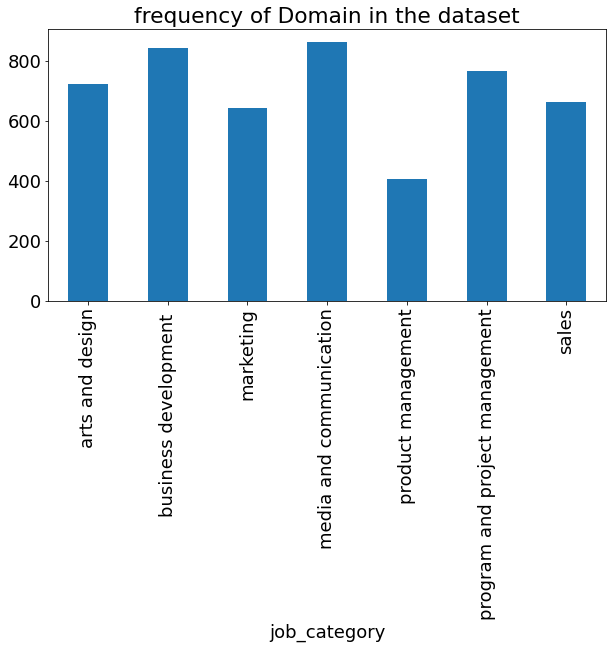

In [18]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(10,5))
df1.groupby('job_category').preprocessed.count().plot.bar(ylim=0)
#plt.xticks(rotation=45)
plt.title('frequency of Domain in the dataset')
plt.show()

In [19]:
# making tfidf vector of the text in description column
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.preprocessed).toarray()
labels = df1.category_id
features.shape

(4910, 7245)

In [20]:
# findning out most common features of different Domain
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for perprocessed, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(perprocessed))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print(" ")

# 'arts and design':
  . Most correlated unigrams:
. design
. designer
  . Most correlated bigrams:
. design intern
. graphic designer
 
# 'business development ':
  . Most correlated unigrams:
. deloitte
. analyst
  . Most correlated bigrams:
. deloitte india
. analyst deloitte
 
# 'marketing':
  . Most correlated unigrams:
. marketer
. marketing
  . Most correlated bigrams:
. digital marketing
. marketing intern
 
# 'media and communication':
  . Most correlated unigrams:
. content
. writer
  . Most correlated bigrams:
. medical writer
. content writer
 
# 'product management':
  . Most correlated unigrams:
. manager
. product
  . Most correlated bigrams:
. product management
. product manager
 
# 'program and project management':
  . Most correlated unigrams:
. manager
. project
  . Most correlated bigrams:
. program manager
. project manager
 
# 'sales':
  . Most correlated unigrams:
. account
. sales
  . Most correlated bigrams:
. account manager
. sales manager
 


# Linear SVC

In [21]:
# creating word vector and model for prediction
X_train, X_test, y_train, y_test = train_test_split(df1['preprocessed'], df1['job_category'], random_state = 0,stratify = df1['job_category'],test_size=0.25)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [22]:
# checking model prediction in data
print(clf.predict(count_vect.transform(["product designer udaan"])))

['arts and design']


In [23]:
df1[df1['preprocessed'] == "product designer udaan"]

,Unnamed: 0,Job Title,Company Name,Industry,Company Location,New Job (90 Days),Year Started,Profile Headline,Profile Summary,School,...,My Network,Country,Continent,FieldOfStudy,ProfileHeadline,ProfileSummary,total,job_category,preprocessed,category_id
3,3,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,NaN,Vellore Institute of Technology,...,network,India,AS,Computer Science,Product Designer at udaan,,Product Designer at udaan,arts and design,product designer udaan,0
25,25,Product Designer,udaan.com,Information Technology and Services,"Bangalore Urban, Karnataka, India",False,2018.0,Product Designer at udaan,NaN,Vellore Institute of Technology,...,network,India,AS,Computer Science,Product Designer at udaan,,Product Designer at udaan,arts and design,product designer udaan,0


In [24]:
# training accuracy of the model
print(accuracy_score(y_train,clf.predict(X_train_tfidf)))

0.9098316132536665


In [25]:
# testing accuracy of the model
print(accuracy_score(y_test,clf.predict(count_vect.transform(X_test))))

0.5488599348534202


# Multinomial Naive Bayes

In [26]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
# checking model prediction in data
print(clf.predict(count_vect.transform(["product designer udaan"])))

['arts and design']


In [28]:
# training accuracy of the model
print(accuracy_score(y_train,clf.predict(X_train_tfidf)))

0.7045084193373167


In [29]:
# testing accuracy of the model
print(accuracy_score(y_test,clf.predict(count_vect.transform(X_test))))

0.501628664495114


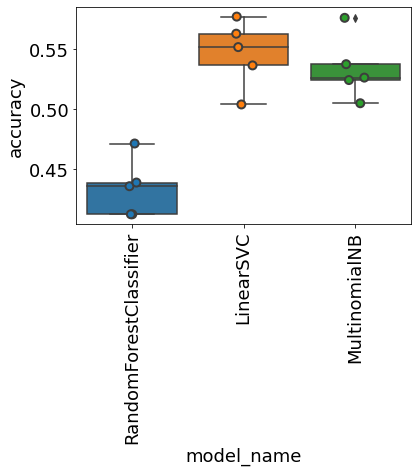

In [30]:
# testing some more models
CV = StratifiedKFold(n_splits=5)
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]
#CV = 5
cv_df = pd.DataFrame(index=range(5 * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV,)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=90)
plt.show()